In [2]:

import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('C:\\Users\\SHIVAM\\desktop\\stock_data.csv')

In [4]:
df.head

<bound method NDFrame.head of       Unnamed: 0        Date   Open   High    Low  Close    Volume  Name
0            NaN    1/3/2006  39.69  41.22  38.79  40.91  24232729  AABA
1            NaN    1/4/2006  41.22  41.90  40.77  40.97  20553479  AABA
2            NaN    1/5/2006  40.93  41.73  40.85  41.53  12829610  AABA
3            NaN    1/6/2006  42.88  43.57  42.80  43.21  29422828  AABA
4            NaN    1/9/2006  43.10  43.66  42.82  43.42  16268338  AABA
...          ...         ...    ...    ...    ...    ...       ...   ...
3014         NaN  12/22/2017  71.42  71.87  71.22  71.58  10979165  AABA
3015         NaN  12/26/2017  70.94  71.39  69.63  69.86   8542802  AABA
3016         NaN  12/27/2017  69.77  70.49  69.69  70.06   6345124  AABA
3017         NaN  12/28/2017  70.12  70.32  69.51  69.82   7556877  AABA
3018         NaN  12/29/2017  69.79  70.13  69.43  69.85   6613070  AABA

[3019 rows x 8 columns]>

In [6]:
df.shape

(3019, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Date        3019 non-null   object 
 2   Open        3019 non-null   float64
 3   High        3019 non-null   float64
 4   Low         3019 non-null   float64
 5   Close       3019 non-null   float64
 6   Volume      3019 non-null   int64  
 7   Name        3019 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 188.8+ KB


In [8]:
df.drop(columns='Unnamed: 0', inplace =True)

In [9]:
df.head

<bound method NDFrame.head of             Date   Open   High    Low  Close    Volume  Name
0       1/3/2006  39.69  41.22  38.79  40.91  24232729  AABA
1       1/4/2006  41.22  41.90  40.77  40.97  20553479  AABA
2       1/5/2006  40.93  41.73  40.85  41.53  12829610  AABA
3       1/6/2006  42.88  43.57  42.80  43.21  29422828  AABA
4       1/9/2006  43.10  43.66  42.82  43.42  16268338  AABA
...          ...    ...    ...    ...    ...       ...   ...
3014  12/22/2017  71.42  71.87  71.22  71.58  10979165  AABA
3015  12/26/2017  70.94  71.39  69.63  69.86   8542802  AABA
3016  12/27/2017  69.77  70.49  69.69  70.06   6345124  AABA
3017  12/28/2017  70.12  70.32  69.51  69.82   7556877  AABA
3018  12/29/2017  69.79  70.13  69.43  69.85   6613070  AABA

[3019 rows x 7 columns]>

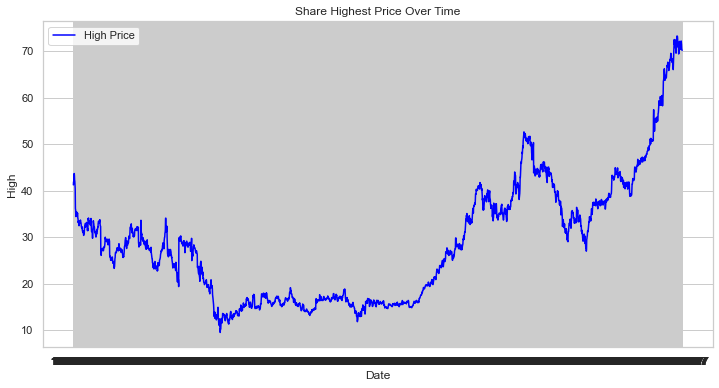

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
 
plt.show()

<Figure size 864x432 with 0 Axes>

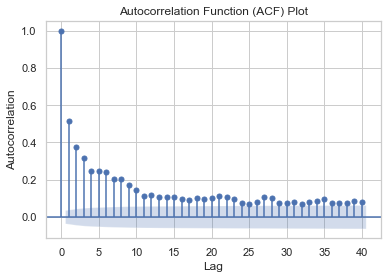

In [11]:
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535941
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


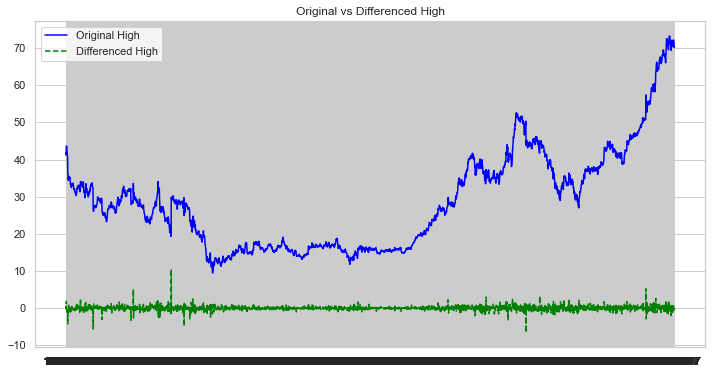

In [14]:
df['high_diff'] = df['High'].diff()
 

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()